# Galton board simulation in Python

## Sketch of the ideas:

1. Consider each sampling of the balls as a 1-dimensional random walk, which takes only two possible directions: left or right, at each step. The directional path (i.e., we don't consider its length but only direction) of the ball is then equivalent to a sequence of L/R (or -1/1, or 0/1, whatever you like) of length $n$, where $n$ is the number of rows of the Galton board (the size of the map).
2. To implement a simulation where the principles are so described, we use the object-oriented programming (OOP) in Python. We implement each trial as a class, where the attributes of it consisting of 
   1. the size of the board (number of rows)
   2. the number of balls
   3. and some other parameters that we may need.
   
3. Then for each sampling of the balls:
   - the method sample() will be called, which return a list of dicts as the result of the sampling, where the keys are:
     - the path
     - the final position of the ball, which is the sum of the path
   - not only the return value, but also result will be appended and stored as attributes `trial.sample_results` of the trial object.
4. Use a for loop to simulate every ball's movement one by one, so that it's then statistically `independent' from each other.
5. Gather the results of those simulations and store them as attributes of the trial object.
6. It's then another new task to analyze the results, for example, to verify the central limit theorem, or to calculate the probability of the balls falling into each bin, etc.

### Remark

1. The so called 'sequence' in 1., is a mathematical concept, and in Python we shall use a list to do it. If we denote the step at each of the two directions as $-1/2$ and $1/2$, the the sum of this sequence will give us the final position of the ball, assuming the starting point is $0$.
1. I am still thinking if we need any advanced libraries to simulate this random walk process. But I guess it may not be so, because the overall math involved here is very simple. Maybe only `random` would be sufficient.
2. Important attributes that must be included in 2. : the size of the board, and the number of the samplings. Because those two, when going to infinite, would give a mathematical approximation of the normal distribution. There is one important difference between the two parameters. While the first one, the size, is fixed, that is, you cannot change it after starting the trial, the second one is not, because the independent property of the distribution. Which means, from a point of view of coding, we can have a slider to interactively change the second one and see the result, but the we cannot do so for the first one.

Now let's start coding.

In [1]:
import random
class trial():
    # attributes: 1. sample_results 2. size
    def __init__(self, sample_results=[], size=10):
        self.sample_results = sample_results
        self.size = size
    def single_sample(self):
        # for each step, randomly choose a number from -1 and 1.
        # if the number is -1, the step goes to the left.
        # if the number is 1, the step goes to the right.
        directional_path = []
        for i in range(self.size):
            directional_path.append(random.choice([-1,1]))
        # the actual path is the same as the directional path, but each step is timed by 1/2.
        path = [step * 0.5 for step in directional_path]
        # the destination is the sum of the path.
        destination = sum(path)
        result = {'path': path, 'destination': destination}
        self.sample_results.append(result)
        return result
    
    def sample(self, n):
        for i in range(n):
            self.single_sample()
        return self.sample_results

In [2]:
# create a trial object
t = trial(size=30)

t.sample(10000)

# print the first 10 results and the last 10 results.
for i in range(10):
    print('Ball ' + str(i) + ' path: ' + str(t.sample_results[i]['path']) + ' destination: ' + str(t.sample_results[i]['destination']))
    print('\n')

for i in range(9990, 10000):
    print('Ball ' + str(i) + ' path: ' + str(t.sample_results[i]['path']) + ' destination: ' + str(t.sample_results[i]['destination']))
    print('\n')

Ball 0 path: [0.5, 0.5, -0.5, 0.5, -0.5, -0.5, -0.5, 0.5, -0.5, 0.5, -0.5, -0.5, 0.5, 0.5, 0.5, 0.5, -0.5, 0.5, -0.5, 0.5, 0.5, 0.5, 0.5, -0.5, -0.5, -0.5, 0.5, -0.5, -0.5, 0.5] destination: 1.0


Ball 1 path: [-0.5, 0.5, -0.5, 0.5, 0.5, -0.5, 0.5, 0.5, -0.5, 0.5, -0.5, -0.5, -0.5, -0.5, 0.5, 0.5, 0.5, -0.5, -0.5, -0.5, 0.5, -0.5, -0.5, 0.5, -0.5, 0.5, 0.5, -0.5, 0.5, 0.5] destination: 0.0


Ball 2 path: [0.5, 0.5, 0.5, -0.5, 0.5, 0.5, -0.5, 0.5, -0.5, 0.5, 0.5, 0.5, -0.5, -0.5, 0.5, -0.5, -0.5, -0.5, -0.5, -0.5, 0.5, -0.5, 0.5, -0.5, -0.5, 0.5, -0.5, -0.5, -0.5, 0.5] destination: -1.0


Ball 3 path: [0.5, 0.5, -0.5, -0.5, 0.5, -0.5, 0.5, 0.5, 0.5, -0.5, 0.5, 0.5, -0.5, -0.5, 0.5, 0.5, 0.5, 0.5, -0.5, -0.5, 0.5, 0.5, -0.5, 0.5, -0.5, -0.5, 0.5, -0.5, 0.5, 0.5] destination: 3.0


Ball 4 path: [0.5, 0.5, -0.5, -0.5, 0.5, 0.5, -0.5, -0.5, -0.5, 0.5, 0.5, 0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, 0.5, 0.5, -0.5, 0.5, -0.5, 0.5, 0.5, 0.5, 0.5, -0.5, -0.5, 0.5] destination: 0.0


Ball 5 path:

In [3]:
# count the number of balls that end up at some specific destination

def count_balls(destination):
    count = 0
    for i in range(len(t.sample_results)):
        if t.sample_results[i]['destination'] == destination:
            count += 1
    return count

destination = 11.0
count = count_balls(destination)
print('The number of balls that end up at the destination ' + str(destination) + ' is: ' + str(count))


destination = -12.0
count = count_balls(destination)
print('The number of balls that end up at the destination ' + str(destination) + ' is: ' + str(count))

The number of balls that end up at the destination 11.0 is: 0
The number of balls that end up at the destination -12.0 is: 0


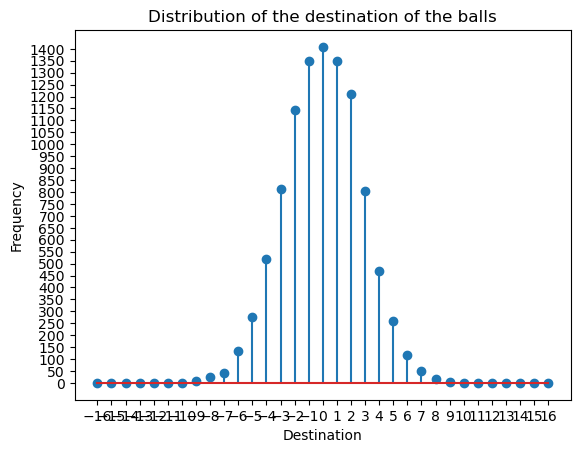

In [4]:
import numpy as np

import matplotlib.pyplot as plt

# use stem to plot the distribution of the destination of the balls:
# x-axis: destination
# y-axis: frequency

destination_range = range(-16,17)
# for each destination, calculate the frequency
frequency = []
for d in destination_range:
    frequency.append(count_balls(d))

plt.stem(destination_range, frequency)
plt.xlabel('Destination')
plt.ylabel('Frequency')
plt.title('Distribution of the destination of the balls')

# Set the x-axis ticks to show every integer
plt.xticks(np.arange(min(destination_range), max(destination_range)+1, 1))
plt.yticks(np.arange(0, max(frequency)+1, 50))

plt.show()
